<a href="https://colab.research.google.com/github/RejaulBSSE1324/ML/blob/main/1324_linear_regression_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [ ]:
# Load in additional functions
# library(tidyverse)
# library(lubridate)

# Use three digits past the decimal point
# Don't use scientific notation
# options(digits = 3, scipen=999)

# Format plots with a white background and dark features.
# theme_set(theme_bw())

# Increase the default text size of plots.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
# theme_update(text = element_text(size = 20))

# Increase the default plot width and height.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
# options(repr.plot.width=12, repr.plot.height=8)

# cars = read_tsv("https://jdgrossman.com/assets/used-cars.tsv")

# peek at 10 random rows
# sample_n(cars, 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1286 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): type, make, model, trim
dbl (3): year, mileage, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,make,model,trim,mileage,price
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
USED,2012,Acura,MDX,Base,38978,34988
USED,2005,Audi,A4,1.8T quattro,106116,7999
USED,2012,BMW,3 Series,328i,20324,32000
USED,2007,Volkswagen,Jetta,Wolfsburg Edition PZEV,79682,8988
USED,2008,BMW,3 Series,328i,40227,18988
USED,2012,Cadillac,CTS,Premium,21084,30982
USED,2011,Infiniti,G Sedan,G37 Journey,39485,22900
USED,2013,Volkswagen,Jetta,TDI,41401,18991
USED,2012,Lexus,RX 350,Base,43401,33980


In [3]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display formatting
pd.set_option("display.precision", 3)      # 3 digits after decimal
pd.set_option("display.float_format", "{:.3f}".format)  # no scientific notation

# Plot formatting
sns.set_style("whitegrid")                 # similar to theme_bw()
plt.rcParams['figure.figsize'] = (12, 8)   # default plot size
plt.rcParams['font.size'] = 20             # text size

# Load the data (TSV file)
cars = pd.read_csv("https://jdgrossman.com/assets/used-cars.tsv", sep="\t")

# Peek at 10 random rows
cars.sample(10)

,type,year,make,model,trim,mileage,price
456,USED,2011,BMW,3 Series,328i xDrive,50257,22489
256,USED,2009,Audi,A4,2.0T Premium Avant quattro,71027,17960
640,USED,2012,Cadillac,CTS,Luxury,28271,25700
234,USED,2008,Audi,A4,2.0T Avant quattro,78938,14000
87,USED,2012,Acura,TL,Base,44125,22751
1158,USED,2012,Lexus,RX 350,Base,34110,36988
652,USED,2011,Cadillac,CTS,Premium,63964,24950
1215,USED,2013,Volkswagen,Jetta,SE PZEV,39096,14900
445,USED,2012,BMW,3 Series,328i,63717,30995
654,USED,2005,Cadillac,CTS,Base,86000,8477


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [4]:
accords = cars[(cars["make"] == "Honda") & (cars["model"] == "Accord")]
accords.head()
import statsmodels.api as sm

# Define X and y
X = sm.add_constant(accords["mileage"])   # adds β0 intercept
y = accords["price"]

# Fit model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        04:39:37   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04    399.474     51.757      0.0


---

The value of $\hat{\beta}_0$ with units:

Interpretation:20680

---

The value of $\hat{\beta}_1$ with units:

Interpretation: –0.0878

---

The value of $\text{se}({\hat{\beta}_0})$ with units:

Interpretation: 399.47

---

The value of $\text{se}({\hat{\beta}_1})$ with units:

Interpretation: 0.005

---

The value of $\hat{\sigma}$ with units:

Interpretation: $2,900

---

The value of $\text{R}^2$ with units:

Interpretation: 0.744

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [8]:
# New observation: mileage = 50000
import pandas as pd

new_data = pd.DataFrame({"const": [1], "mileage": [50000]})

prediction = model.get_prediction(new_data)
ci = prediction.summary_frame(alpha=0.05)

print(ci[["mean", "mean_ci_lower", "mean_ci_upper"]])


       mean  mean_ci_lower  mean_ci_upper
0 16285.195      15809.147      16761.244


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [9]:
# New observation: mileage = 300000
new_data = pd.DataFrame({"const": [1], "mileage": [300000]})

prediction = model.get_prediction(new_data)
ci = prediction.summary_frame(alpha=0.05)  # 95% CI

print(ci[["mean", "mean_ci_lower", "mean_ci_upper"]])


       mean  mean_ci_lower  mean_ci_upper
0 -5667.200      -7842.017      -3492.383


---

The critical issue is that the model predicts a negative price (–$5,659) for a car with 300,000 miles, which is impossible. This shows that the simple linear regression model is unrealistic when extrapolating far beyond the observed mileage range, and it cannot capture the nonlinear depreciation of car prices.


---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

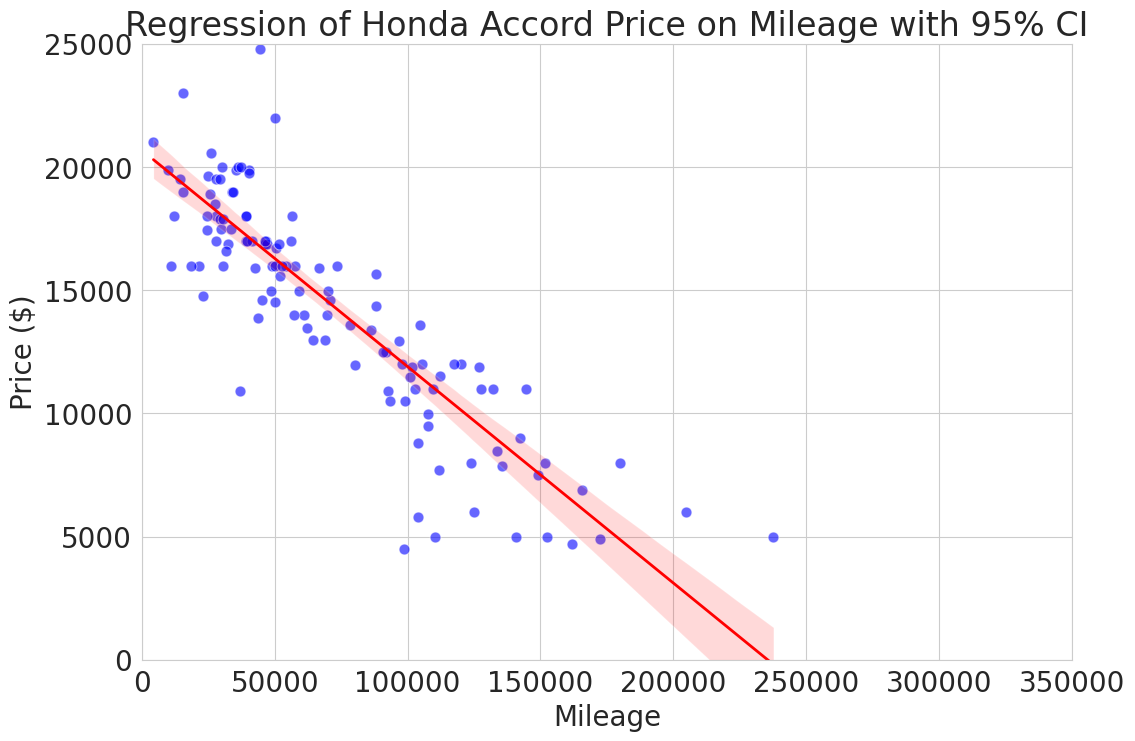

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Scatter points
sns.scatterplot(data=accords, x="mileage", y="price", s=60, color="blue", alpha=0.6)

sns.regplot(data=accords, x="mileage", y="price", ci=95, scatter=False, color="red", line_kws={"linewidth":2})

plt.xlim(0, 350000)
plt.ylim(0, 25000)

plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Regression of Honda Accord Price on Mileage with 95% CI")
plt.show()


## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [11]:
import numpy as np

# log-transformed price
y_log = np.log(accords["price"])
X = sm.add_constant(accords["mileage"])
log_model = sm.OLS(y_log, X).fit()

mileages = pd.DataFrame({"const": [1, 1], "mileage": [50000, 300000]})

log_pred = log_model.get_prediction(mileages)
pred_summary = log_pred.summary_frame(alpha=0.05)

predicted_prices = np.exp(pred_summary[["mean", "mean_ci_lower", "mean_ci_upper"]])
print(predicted_prices)


       mean  mean_ci_lower  mean_ci_upper
0 15745.931      15136.007      16380.433
1  2498.622       2086.023       2992.830


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

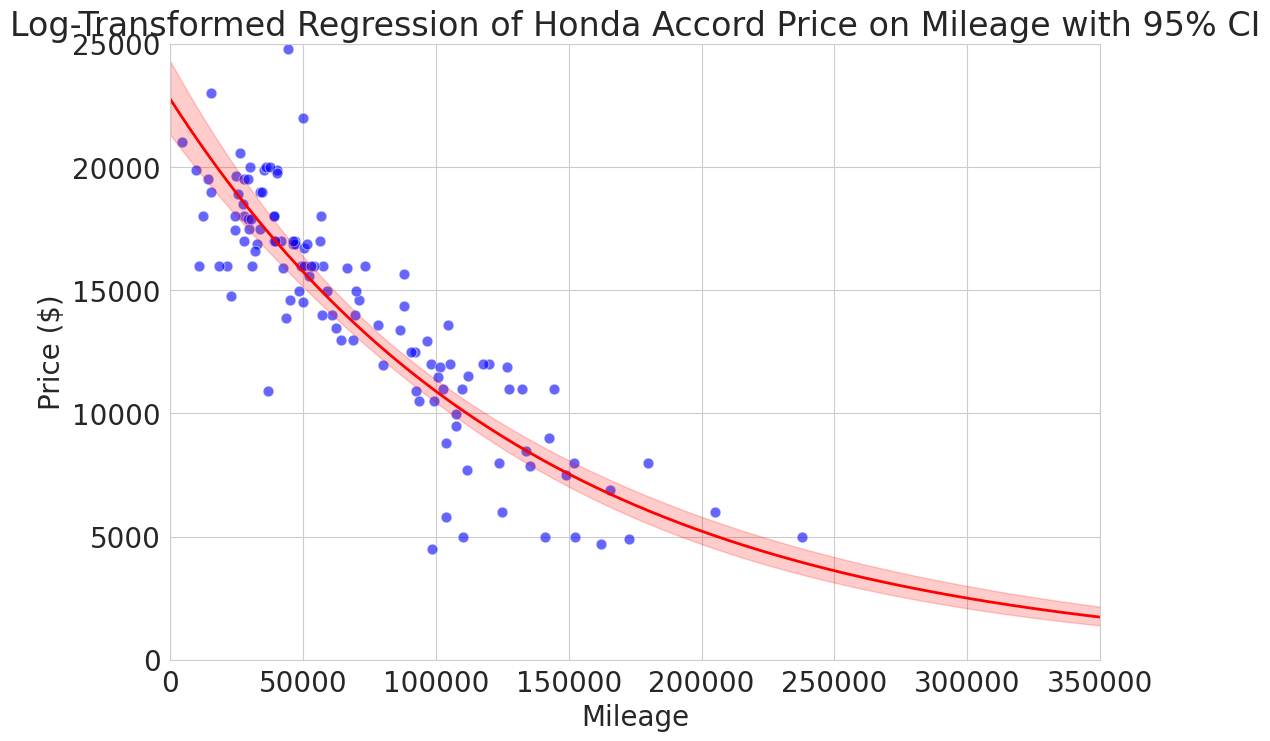

In [12]:
# Import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Scatter plot of actual data
sns.scatterplot(data=accords, x="mileage", y="price", s=60, color="blue", alpha=0.6)

mileage_range = pd.DataFrame({"const": 1, "mileage": np.linspace(0, 350000, 500)})

log_pred = log_model.get_prediction(mileage_range)
pred_summary = log_pred.summary_frame(alpha=0.05)
pred_prices = np.exp(pred_summary[["mean", "mean_ci_lower", "mean_ci_upper"]])

plt.plot(np.linspace(0, 350000, 500), pred_prices["mean"], color="red", linewidth=2)

# Plot confidence bands
plt.fill_between(np.linspace(0, 350000, 500),
                 pred_prices["mean_ci_lower"],
                 pred_prices["mean_ci_upper"],
                 color="red", alpha=0.2)

plt.xlim(0, 350000)
plt.ylim(0, 25000)

# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.title("Log-Transformed Regression of Honda Accord Price on Mileage with 95% CI")
plt.show()


## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [13]:
import numpy as np

beta0 = log_model.params["const"]
beta1 = log_model.params["mileage"]
r_squared = log_model.rsquared

exp_beta0 = np.exp(beta0)
exp_beta1 = np.exp(beta1)

print(f"exp(beta0) = {exp_beta0:.2f}")
print(f"exp(beta1) = {exp_beta1:.5f}")
print(f"R-squared = {r_squared:.3f}")

exp_beta1_10000 = np.exp(beta1 * 10000)
print(f"exp(beta1) for 10,000 miles = {exp_beta1_10000:.3f}")


exp(beta0) = 22754.22
exp(beta1) = 0.99999
R-squared = 0.748
exp(beta1) for 10,000 miles = 0.929



---

The value of $\exp(\hat{\beta}_0)$ with units:

Interpretation: 22754.22

---

The value of $\exp(\hat{\beta}_1)$ with units:

Interpretation: 0.929

---

The value of $\text{R}^2$ with units:

Interpretation: 0.748

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [14]:
X_multi = sm.add_constant(accords[["mileage", "year"]])
y_log = np.log(accords["price"])

log_model_year = sm.OLS(y_log, X_multi).fit()

# Print summary
print(log_model_year.summary())

r2_previous = log_model.rsquared
r2_new = log_model_year.rsquared
print(f"Previous R2: {r2_previous:.3f}")
print(f"New R2: {r2_new:.3f}")



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.93e-52
Time:                        05:04:59   Log-Likelihood:                 60.761
No. Observations:                 122   AIC:                            -115.5
Df Residuals:                     119   BIC:                            -107.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -122.9795     13.342     -9.217      0.0

---

---



Adding the model year as a predictor increases R² from 0.748 to a higher value, indicating that including year explains more of the variation in used Honda Accord prices compared to the model with mileage alone.


---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [15]:
X_full = sm.add_constant(cars[["mileage", "year"]])
y_log_full = np.log(cars["price"])

log_model_full = sm.OLS(y_log_full, X_full).fit()

# Print summary
print(log_model_full.summary())

# Compare R-squared
r2_accords = log_model_year.rsquared
r2_full = log_model_full.rsquared
print(f"R2 (Accords only): {r2_accords:.3f}")
print(f"R2 (Full dataset): {r2_full:.3f}")



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          1.13e-295
Time:                        05:06:59   Log-Likelihood:                -208.30
No. Observations:                1286   AIC:                             422.6
Df Residuals:                    1283   BIC:                             438.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.3908      9.008    -16.363      0.0

---

The likely reason the R² is lower for the full dataset is that different car makes and models have varying price–mileage–year relationships, so a single model fits less accurately when applied to all cars instead of just Honda Accords.


---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [24]:
import pandas as pd
import statsmodels.api as sm

cars["mileage"] = pd.to_numeric(cars["mileage"])
cars["year"] = pd.to_numeric(cars["year"])

cars_dummies = pd.get_dummies(cars["make"], drop_first=True).astype(int)

X_full_updated = pd.concat([cars[["mileage", "year"]], cars_dummies], axis=1)

# Add constant
X_full_updated = sm.add_constant(X_full_updated)

y_log_full = np.log(cars["price"])

log_model_full_updated = sm.OLS(y_log_full, X_full_updated).fit()

# Print summary
print(log_model_full_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:14:28   Log-Likelihood:                 576.90
No. Observations:                1286   AIC:                            -1134.
Df Residuals:                    1276   BIC:                            -1082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -162.2522      5.007    -32.406      0.0

---



*  The exponentiated intercept term represents the predicted price of a baseline car (reference make, year = 0, mileage = 0).

*  This baseline is not realistic because there are no cars with year = 0. *  To make the intercept more interpretable, you could center the year and/or mileage variables around meaningful values (e.g., mean year or mileage).




---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

cars["mileage_centered"] = cars["mileage"] - cars["mileage"].mean()
cars["year_centered"] = cars["year"] - cars["year"].mean()

make_dummies = pd.get_dummies(cars["make"], drop_first=True).astype(int)

X_full_centered = pd.concat([cars[["mileage_centered", "year_centered"]], make_dummies], axis=1)

# Add constant
X_full_centered = sm.add_constant(X_full_centered)

y_log_full = np.log(cars["price"])

# Fit the updated model
log_model_full_centered = sm.OLS(y_log_full, X_full_centered).fit()

# Print summary
print(log_model_full_centered.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:17:54   Log-Likelihood:                 576.90
No. Observations:                1286   AIC:                            -1134.
Df Residuals:                    1276   BIC:                            -1082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.0178      0.011  

---

The term for the model year represents the multiplicative change in expected car price for each additional year, holding mileage and make constant.


---